In [16]:
#importing the packages i will be using for the analysis
#import Pandas
import  pandas as pd

#import Numpy
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

#import seaborn
import seaborn as sns
import ast


In [17]:
basics_df =pd.read_csv( 'title.basics.csv', index_col=0)
basics_df

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [18]:
#basics_df['start_year'].value_counts()

In [19]:
movies_df =pd.read_csv( 'tmdb.movies.csv', index_col=0)
movies_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


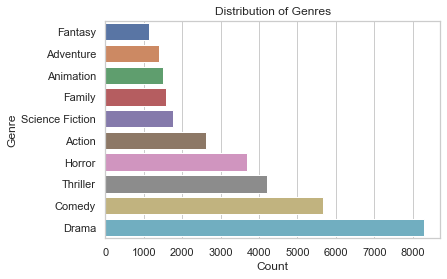

In [20]:
genres_count = {}
for genres_list in movies_df['genre_ids']:
    genres_list = ast.literal_eval(genres_list)  # Convert string representation of list to a Python list
    for genre_id in genres_list:
        if genre_id in genres_count:
            genres_count[genre_id] += 1
        else:
            genres_count[genre_id] = 1

# Creating a DataFrame for plotting
genres_df = pd.DataFrame(list(genres_count.items()), columns=['Genre ID', 'Count'])

# Sample genre mapping (Replace this with your actual genre mapping)
genre_mapping = {
    12: 'Adventure',
    14: 'Fantasy',
    10751: 'Family',
    16: 'Animation',
    28: 'Action',
    878: 'Science Fiction',
    35: 'Comedy',
    53: 'Thriller',
    27: 'Horror',
    18: 'Drama'
}

# Adding genre names to the DataFrame
genres_df['Genre Name'] = genres_df['Genre ID'].map(genre_mapping)

# Sorting by count in ascending order
genres_df.sort_values('Count', ascending=True, inplace=True)

# Plotting using Seaborn
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Genre Name', data=genres_df)

# Display the plot
import matplotlib.pyplot as plt
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Distribution of Genres')
plt.show()



In [21]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [22]:
movie_info_df = pd.read_csv('rt.movie_info.tsv',sep = '\t')


In [23]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [24]:
#movie_info_df['genre'].value_counts()

In [25]:
#movie_info_df['box_office']

In [26]:
#movie_info_df['studio'].value_counts()

In [27]:
#studio_df = movie_info_df[['studio','genre']]

In [28]:
movie_budget_df=pd.read_csv('tn.movie_budgets.csv', index_col=0)
movie_budget_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


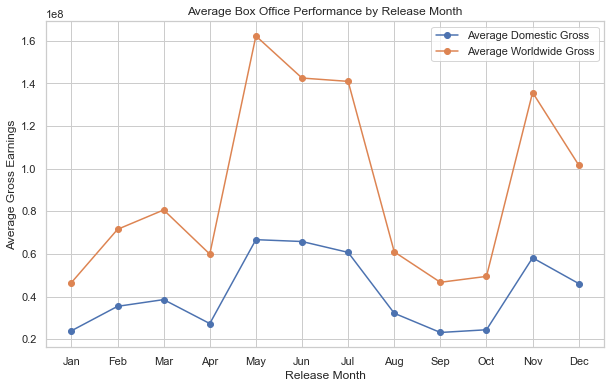

In [29]:

# Assuming your movie budget DataFrame is already loaded as 'movie_budget_df'

# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Extract month and year from the 'release_date' column
movie_budget_df['release_month'] = pd.to_datetime(movie_budget_df['release_date']).dt.month
movie_budget_df['release_year'] = pd.to_datetime(movie_budget_df['release_date']).dt.year

# Group the data by release month and calculate the average domestic and worldwide gross
monthly_avg_gross = movie_budget_df.groupby('release_month').agg({
    'domestic_gross': 'mean',
    'worldwide_gross': 'mean'
}).reset_index()

# Sort the data by release month for proper plotting
monthly_avg_gross = monthly_avg_gross.sort_values('release_month')

# Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_gross['release_month'], monthly_avg_gross['domestic_gross'], marker='o', label='Average Domestic Gross')
plt.plot(monthly_avg_gross['release_month'], monthly_avg_gross['worldwide_gross'], marker='o', label='Average Worldwide Gross')
plt.xlabel('Release Month')
plt.ylabel('Average Gross Earnings')
plt.title('Average Box Office Performance by Release Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the correlation coefficient between 'production_budget' and 'domestic_gross'
correlation_domestic = movie_budget_df['production_budget'].corr(movie_budget_df['domestic_gross'])

# Calculate the correlation coefficient between 'production_budget' and 'worldwide_gross'
correlation_worldwide = movie_budget_df['production_budget'].corr(movie_budget_df['worldwide_gross'])

print("Correlation between Production Budget and Domestic Gross:", correlation_domestic)
print("Correlation between Production Budget and Worldwide Gross:", correlation_worldwide)


Correlation between Production Budget and Domestic Gross: 0.6856818396752735
Correlation between Production Budget and Worldwide Gross: 0.7483059765694753


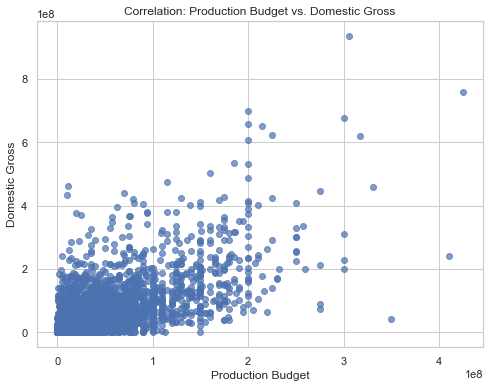

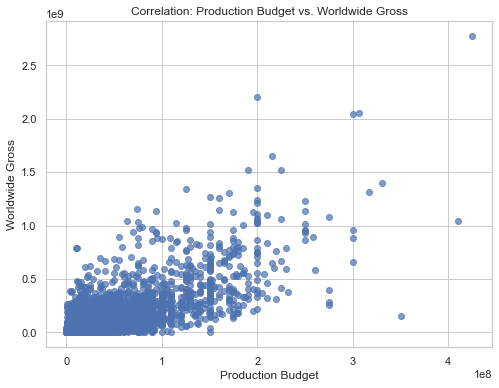

In [31]:
# Create scatter plot for 'production_budget' vs. 'domestic_gross'
plt.figure(figsize=(8, 6))
plt.scatter(movie_budget_df['production_budget'], movie_budget_df['domestic_gross'], alpha=0.7)
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.title('Correlation: Production Budget vs. Domestic Gross')
plt.grid(True)
plt.show()

# Create scatter plot for 'production_budget' vs. 'worldwide_gross'
plt.figure(figsize=(8, 6))
plt.scatter(movie_budget_df['production_budget'], movie_budget_df['worldwide_gross'], alpha=0.7)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Correlation: Production Budget vs. Worldwide Gross')
plt.grid(True)
plt.show()

In [32]:


# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Identify top-grossing movies based on domestic gross
top_domestic_gross_movies = movie_budget_df.sort_values(by='domestic_gross', ascending=False).head(10)

# Identify top-grossing movies based on worldwide gross
top_worldwide_gross_movies = movie_budget_df.sort_values(by='worldwide_gross', ascending=False).head(10)

# Identify highest production budget films
highest_production_budget_movies = movie_budget_df.sort_values(by='production_budget', ascending=False).head(10)

# Display the results
print("Top-Grossing Movies based on Domestic Gross:")
print(top_domestic_gross_movies[['movie', 'domestic_gross']])
print("\nTop-Grossing Movies based on Worldwide Gross:")
print(top_worldwide_gross_movies[['movie', 'worldwide_gross']])
print("\nHighest Production Budget Films:")
print(highest_production_budget_movies[['movie', 'production_budget']])

Top-Grossing Movies based on Domestic Gross:
                                   movie  domestic_gross
id                                                      
6   Star Wars Ep. VII: The Force Awakens     936662225.0
1                                 Avatar     760507625.0
42                         Black Panther     700059566.0
7                 Avengers: Infinity War     678815482.0
43                               Titanic     659363944.0
34                        Jurassic World     652270625.0
27                          The Avengers     623279547.0
5      Star Wars Ep. VIII: The Last Jedi     620181382.0
44                         Incredibles 2     608581744.0
75                       The Dark Knight     533720947.0

Top-Grossing Movies based on Worldwide Gross:
                                            movie  worldwide_gross
id                                                                
1                                          Avatar     2.776345e+09
43                     

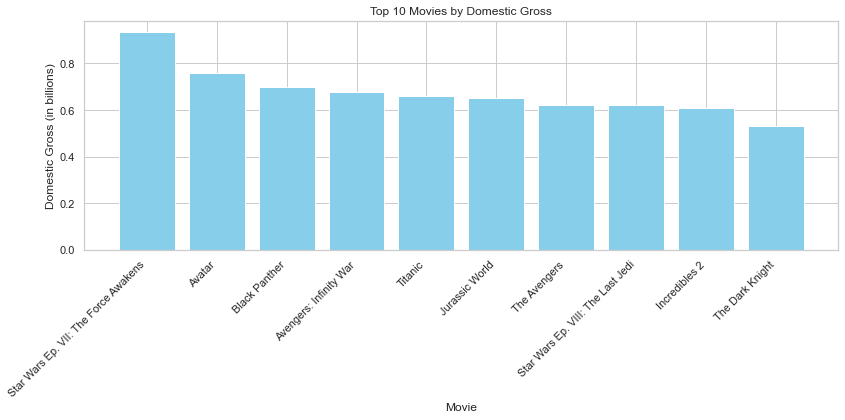

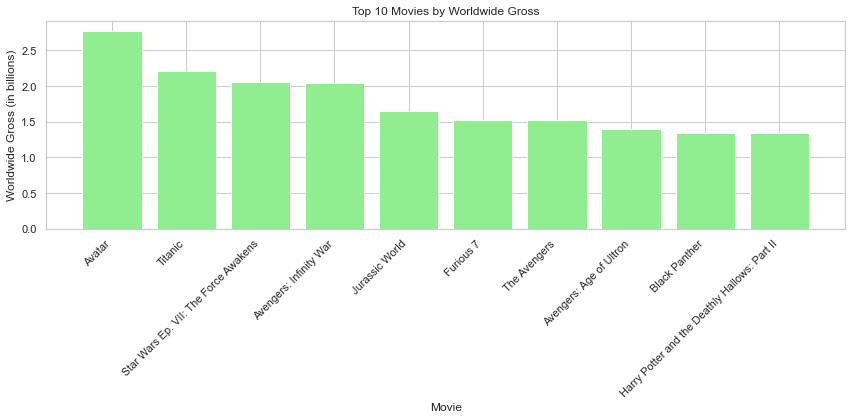

In [33]:
# Data Visualization - Bar plot for top-grossing movies based on domestic gross
plt.figure(figsize=(12, 6))
plt.bar(top_domestic_gross_movies['movie'], top_domestic_gross_movies['domestic_gross'] / 1e9, color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Domestic Gross (in billions)')
plt.title('Top 10 Movies by Domestic Gross')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Visualization - Bar plot for top-grossing movies based on worldwide gross
plt.figure(figsize=(12, 6))
plt.bar(top_worldwide_gross_movies['movie'], top_worldwide_gross_movies['worldwide_gross'] / 1e9, color='lightgreen')
plt.xlabel('Movie')
plt.ylabel('Worldwide Gross (in billions)')
plt.title('Top 10 Movies by Worldwide Gross')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()







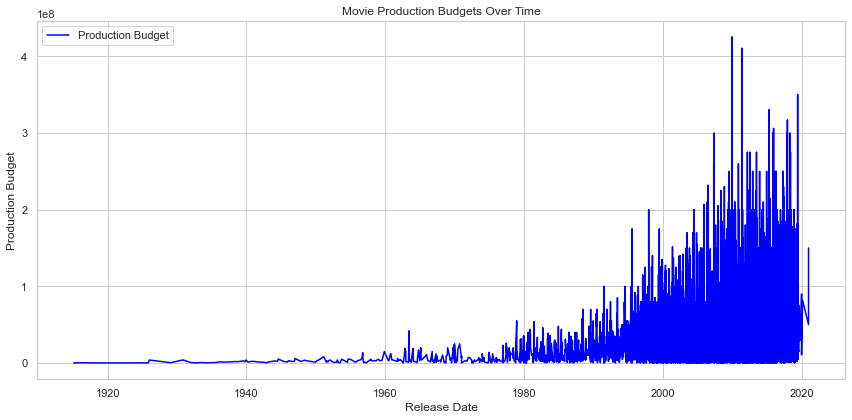

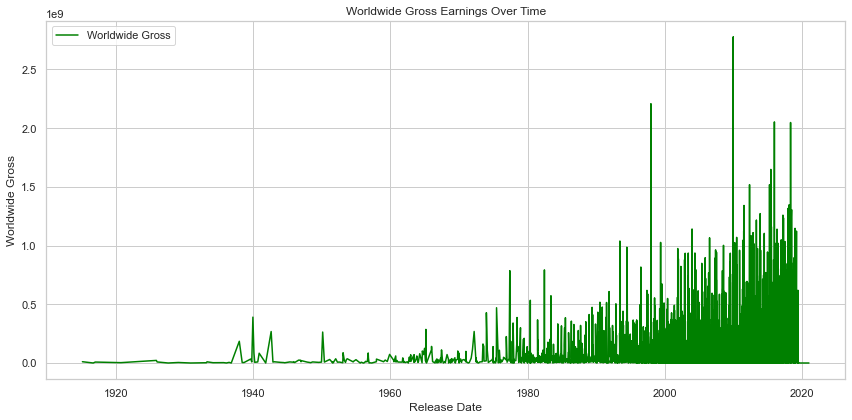

In [34]:

# Convert 'release_date' to a proper date format
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])

# Set 'release_date' as the DataFrame index (for time series analysis)
movie_budget_df.set_index('release_date', inplace=True)

# Sort the DataFrame by the 'release_date' index in ascending order
movie_budget_df.sort_index(ascending=True, inplace=True)

# Data Visualization - Line plot for movie budgets over time
plt.figure(figsize=(12, 6))
plt.plot(movie_budget_df.index, movie_budget_df['production_budget'], label='Production Budget', color='blue')
plt.xlabel('Release Date')
plt.ylabel('Production Budget')
plt.title('Movie Production Budgets Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Visualization - Line plot for worldwide gross earnings over time
plt.figure(figsize=(12, 6))
plt.plot(movie_budget_df.index, movie_budget_df['worldwide_gross'], label='Worldwide Gross', color='green')
plt.xlabel('Release Date')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross Earnings Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()